<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB
Dataset Info:
 None

Dataset Description:
           glucose  bloodpressure    diabetes
count  995.000000     995.000000  995.000000
mean    44.306533      79.184925    0.500503
std      6.707567       9.340204    0.500251
min     20.000000      50.000000    0.000000
25%     40.000000      72.000000    0.000000
50%     45.000000      80.000000    1.000000
75%     50.000000      87.000000    1.000000
max     70.000000     100.000000    1.000000

Data Types:
 glucose          int64
bloodpressure    int64
diabetes         int64
dtype: object

Correlation Matrix:
                 glucose  bloodpressure  diabetes
glucose        1.000000      -0

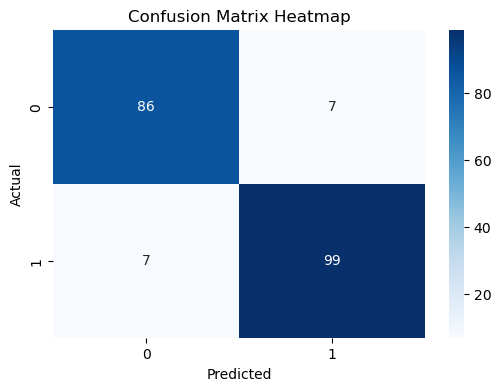

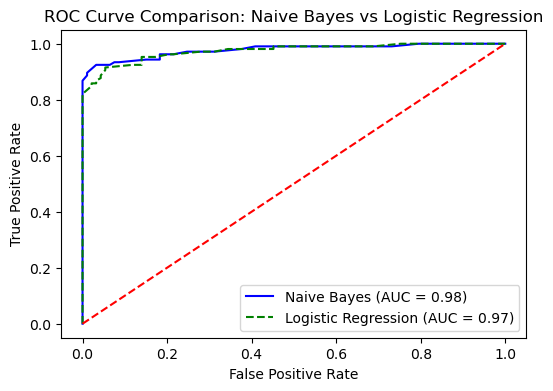

<Figure size 600x400 with 0 Axes>

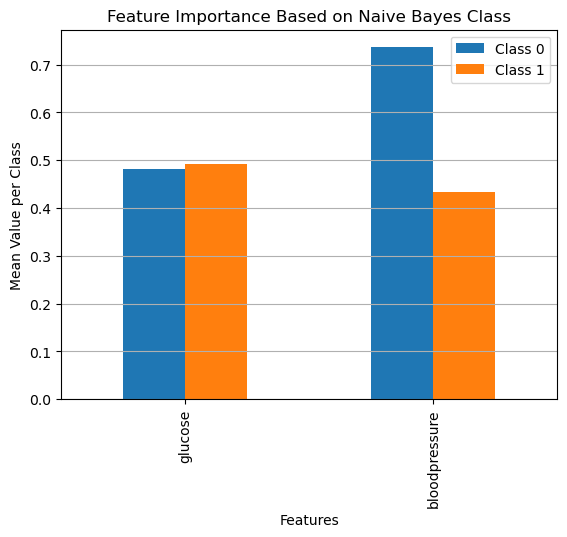

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LinearRegression, LogisticRegression

# Get the dataset
file_path = "~/Downloads/Naive-Bayes-Classification-Data.csv"  # Update to classifications for naive bayes

# Load the .csv file into a data frame in Python
df = pd.read_csv(file_path)


# Describe the data, provide information on the dataset
print("Dataset Info:\n", df.info())
print("\nDataset Description:\n", df.describe())
print("\nData Types:\n", df.dtypes)

# Normalize Data with the minmax scaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Split the list of labels accordingly and training
X = df_scaled.iloc[:, :-1]  # Independent variables
y = df_scaled.iloc[:, -1]   # Dependent variable (Target in this case as class 0 or 1 for diabetes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conduct Gaussian Naive Bayes Classification
model = GaussianNB()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get scores for ROC Curve in graphs below

# Print the confusion matrix and add the correlation matrix as well
corr_matrix = df.corr()
print("\nCorrelation Matrix:\n", corr_matrix)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Prediction:",y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)


# Evaluate the model
report = classification_report(y_test, y_pred) #Moved confusion matrix from evaluate
cross_val = cross_val_score(model, X, y, cv=5).mean()

print("Classification Report:\n", report)
print("Cross-Validation Score:", cross_val)

#  Generate Relevant Graphs
## Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Train ROC Comparison
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_lr_prob = log_reg.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_prob)


## Plot ROC Curve Comparison with a logistic regression line 
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"Naive Bayes (AUC = {roc_auc:.2f})")
plt.plot(fpr_lr, tpr_lr, linestyle="dashed", color="green", label=f"Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})")
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Naive Bayes vs Logistic Regression")
plt.legend()
plt.show()

##Feature Importance Barplot for the dataset's variables
plt.figure(figsize=(6,4)) # shows changes based on glucose and bloodpressure
feature_importance = pd.DataFrame(model.theta_.T, index=X.columns, columns=["Class 0", "Class 1"])
feature_importance.plot(kind='bar')
plt.title("Feature Importance Based on Naive Bayes Class")
plt.xlabel("Features")
plt.ylabel("Mean Value per Class")
plt.grid(axis="y")
plt.show()